# IMDb

In [1]:
import pandas as pd

In [2]:
dataloc = "https://datasets.imdbws.com/"

In [3]:
basics = pd.read_csv(f"{dataloc}title.basics.tsv.gz",
                     compression="gzip",
                     delimiter="\t",
                     na_values="\\N",
                     usecols=["tconst", "titleType", "primaryTitle", "startYear", "runtimeMinutes"]
                    )

/usr/local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
basics.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes
0,tt0000001,short,Carmencita,1894.0,1.0
1,tt0000002,short,Le clown et ses chiens,1892.0,5.0
2,tt0000003,short,Pauvre Pierrot,1892.0,4.0
3,tt0000004,short,Un bon bock,1892.0,12.0
4,tt0000005,short,Blacksmith Scene,1893.0,1.0


In [5]:
basics.dtypes

tconst             object
titleType          object
primaryTitle       object
startYear         float64
runtimeMinutes     object
dtype: object

In [6]:
ratings = pd.read_csv(f"{dataloc}title.ratings.tsv.gz", compression="gzip", delimiter="\t")

In [7]:
ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1684
1,tt0000002,6.0,207
2,tt0000003,6.5,1421
3,tt0000004,6.1,121
4,tt0000005,6.1,2221


In [8]:
ratings.dtypes

tconst            object
averageRating    float64
numVotes           int64
dtype: object

In [9]:
joined = basics.merge(ratings, on="tconst")

In [10]:
joined = joined.astype({"startYear":"Int64"})

In [11]:
joined.shape

(1123707, 7)

In [12]:
joined = joined[joined["runtimeMinutes"]!="Reality-TV"]    # remove erroneous record

In [13]:
joined = joined[joined["runtimeMinutes"]!="Game-Show"]    # remove erroneous record

In [14]:
joined.shape

(1123705, 7)

In [15]:
joined = joined.astype({"runtimeMinutes":float}).astype({"runtimeMinutes":"Int64"})

In [16]:
joined.head()

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,averageRating,numVotes
0,tt0000001,short,Carmencita,1894,1,5.7,1684
1,tt0000002,short,Le clown et ses chiens,1892,5,6.0,207
2,tt0000003,short,Pauvre Pierrot,1892,4,6.5,1421
3,tt0000004,short,Un bon bock,1892,12,6.1,121
4,tt0000005,short,Blacksmith Scene,1893,1,6.1,2221


In [17]:
rating_by_runtime = joined[joined["runtimeMinutes"] <= 300].groupby("runtimeMinutes").agg(["mean","std", "count"])

In [18]:
rating_by_runtime.head()

startYear                   averageRating                   \
                       mean        std  count          mean       std  count   
runtimeMinutes                                                                 
0               1931.166667  50.905468      6      5.783333  1.411973      6   
1               1970.336527  51.550761   3444      6.025610  1.517201   3444   
2               2000.487179  29.391524   4251      6.566996  1.485796   4251   
3               2003.989336  21.019454   9002      6.714194  1.420134   9004   
4               2003.435556  17.901596  12763      6.715435  1.367024  12763   

                  numVotes                      
                      mean          std  count  
runtimeMinutes                                  
0               656.333333  1077.149139      6  
1               107.878339   357.253790   3444  
2                61.313573   291.321409   4251  
3                58.097623   420.738271   9004  
4                57.783593   379.373845  12763

In [19]:
rbr = rating_by_runtime["averageRating"].reset_index()

In [20]:
rbr.head()

,runtimeMinutes,mean,std,count
0,0,5.783333,1.411973,6
1,1,6.025610,1.517201,3444
2,2,6.566996,1.485796,4251
3,3,6.714194,1.420134,9004
4,4,6.715435,1.367024,12763


In [21]:
import matplotlib.pyplot as plt

<ErrorbarContainer object of 3 artists>

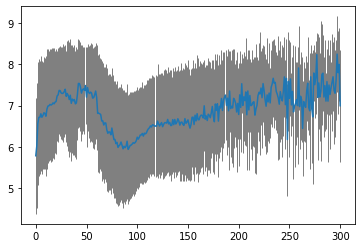

In [22]:
plt.errorbar(rbr.index, 'mean', yerr='std', data=rbr, ecolor="gray", elinewidth=1)

<AxesSubplot:xlabel='runtimeMinutes'>

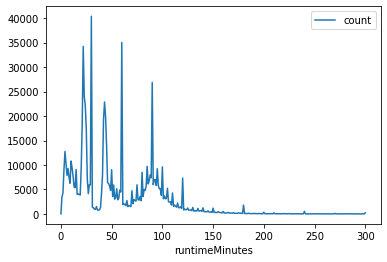

In [23]:
rbr.plot("runtimeMinutes", "count")